We are not sure about the correctly of QNG function, so we calculate by hand and compare it with QNG's result. See more at ./others/Check QNG by hand (Bin Ho).pdf

In [1]:
import qiskit
import numpy as np
import qtm.base_qtm, qtm.constant, qtm.qtm_1qubit, qtm.quantum_fisher

Figure(253.926x144.48)
[[-2.22044605e-16 -6.16297582e-33]
 [-6.16297582e-33  1.00000000e+00]]


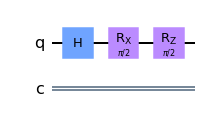

In [8]:

def create_test_circuit(qc, thetas):
    qc.h(0)
    qc.rx(thetas[0], 0)
    qc.rz(thetas[1], 0)
    return qc

qc = qiskit.QuantumCircuit(1, 1)
thetas = np.array([np.pi/2, np.pi/2])

grad_psi1 = qtm.base_qtm.grad_psi(qc, create_test_circuit, thetas, r = 1/2, s = np.pi)
grad_loss = qtm.base_qtm.grad_loss(qc, create_test_circuit, thetas, r = 1/2, s = np.pi/2)

qc_copy = create_test_circuit(qc.copy(), thetas)

print(qc_copy.draw('mpl'))
psi = qiskit.quantum_info.Statevector.from_instruction(qc_copy).data
# Create gradient of loss function
# Quantum natural gradient
F = qtm.quantum_fisher.create_QFIM(psi, grad_psi1)

print(F)

The results seems to ok

In [ ]:
# Init quantum tomography 1 qubit
def a(qc, thetas):
    qc.h(0)
    qc.rz(thetas[0], 0)
    return qc
thetas = np.zeros((1,))
qc = qiskit.QuantumCircuit(1, 1)
grad_psi1 = qtm.base_qtm.grad_psi(qc.copy(), a, thetas, r = 1/2, s = np.pi)
print(grad_psi1)
qc_copy = a(qc.copy(), thetas)
psi = qiskit.quantum_info.Statevector.from_instruction(qc_copy).data
F = qtm.quantum_fisher.create_QFIM(psi, grad_psi1)
print(F)

# F must be [[1]]